# Inflation History

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from src.utils import apply_matplotlib_settings
from src.quant.inflation_history.utils import (
    plot_countries,
    get_er_inflation_data,
    plot_er_prices_inflation,
)
import numpy as np

apply_matplotlib_settings()

In [2]:
# import data and clean up the index
data_url = "https://github.com/QuantEcon/lecture-python-intro/raw/main/lectures/datasets/longprices.xls"
df_fig5 = pd.read_excel(
    data_url, sheet_name="all", header=2, index_col=0
).iloc[1:]
df_fig5.index = df_fig5.index.astype(int)

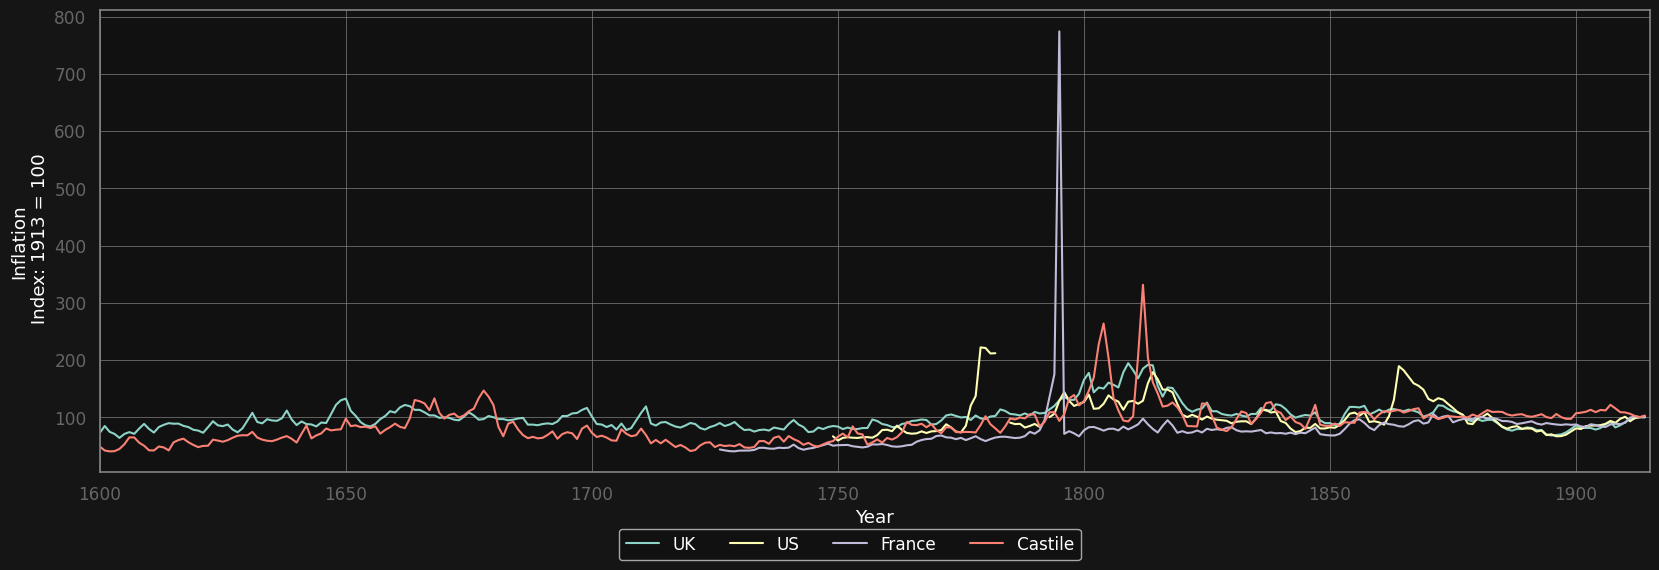

In [3]:
countries = ["UK", "US", "France", "Castile"]
end_year = 1915
start_year = 1600

plot_countries(df_fig5, countries, start_year, end_year)

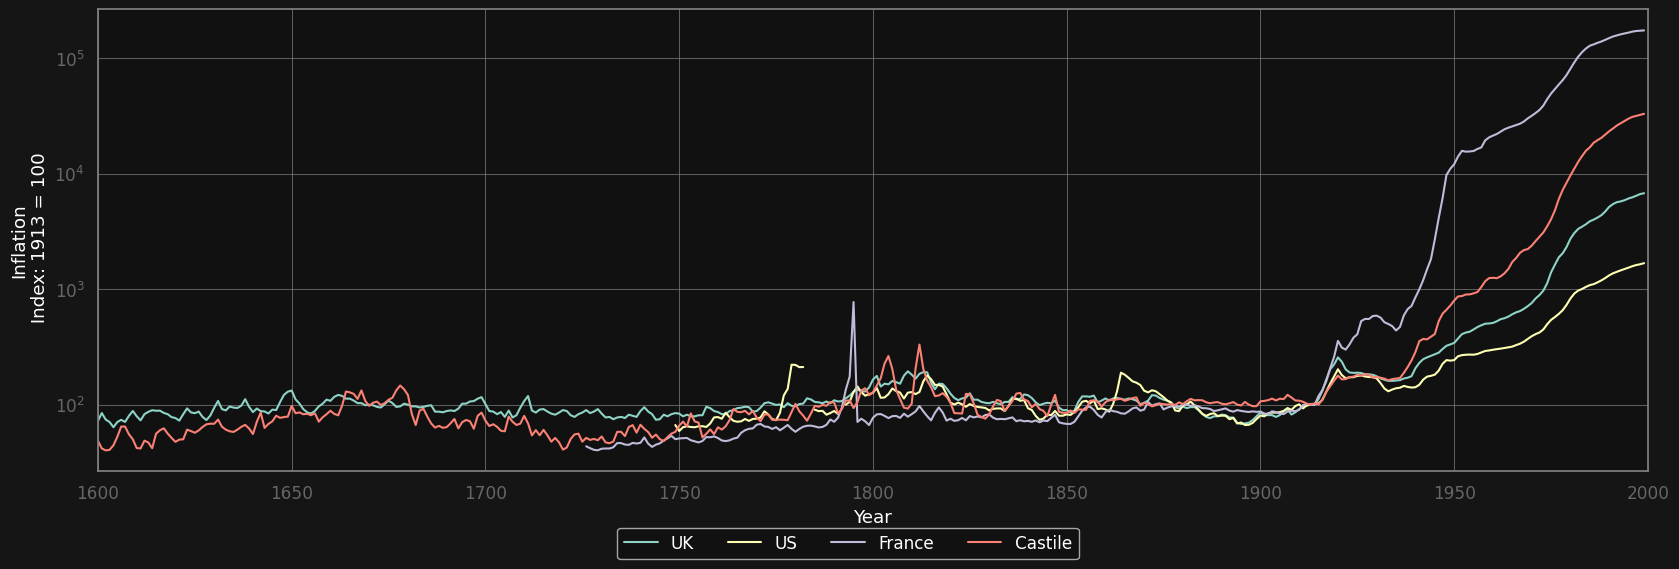

In [4]:
plot_countries(df_fig5, countries, 1600, 2000, "log")

#### Observations

- Proponents of a commodity money system did not trust governments and central banks properly to manage a fiat money system.
- They were willing to pay the resource costs associated with setting up and maintaining a commodity money system.
- The breadth and lengths of the inflationary experiences of the twentieth century under paper money fiat standards are historically unprecedented.

## 4 Big inflations

In [5]:
df_austria, df_hungary, df_poland, df_germany = get_er_inflation_data()

### Austria

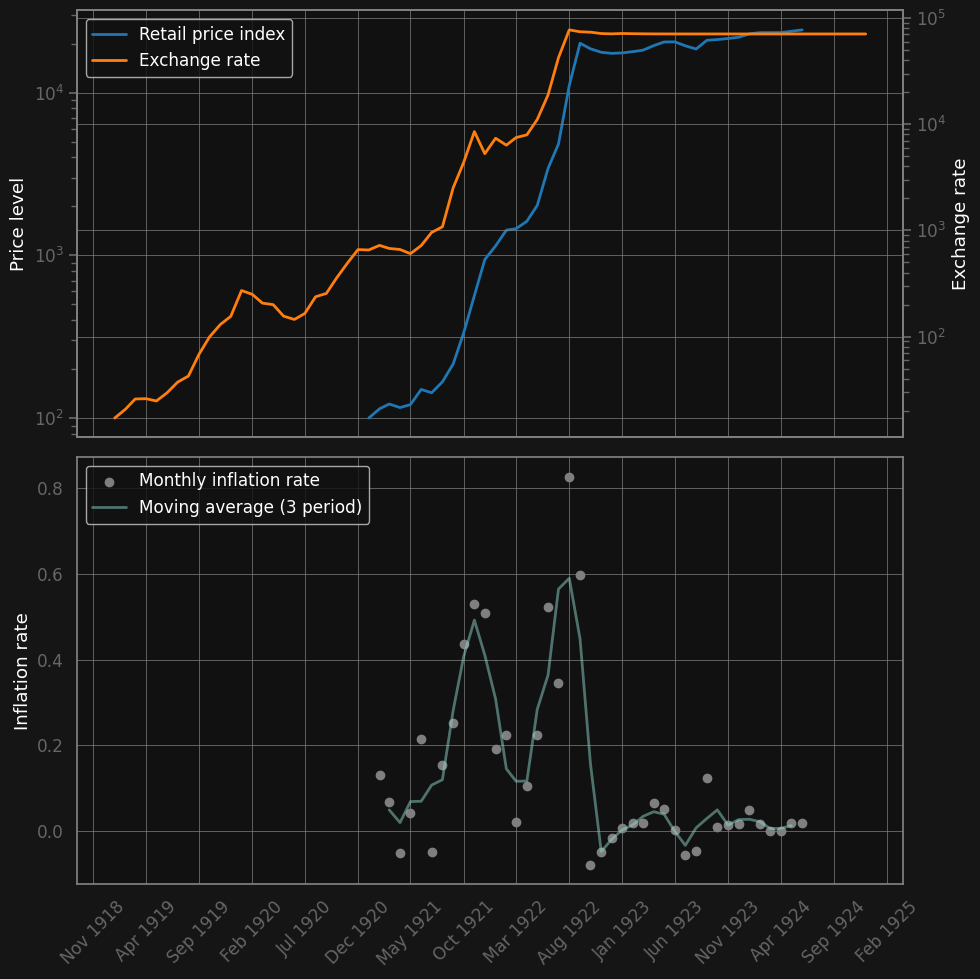

In [6]:
plot_er_prices_inflation(
    price_sequence=df_austria["Retail price index, 52 commodities"],
    exchange_rate_sequence=df_austria["Exchange Rate"],
    labels=["Retail price index", "Exchange rate"],
    index=df_austria.index,
)

### Hungary

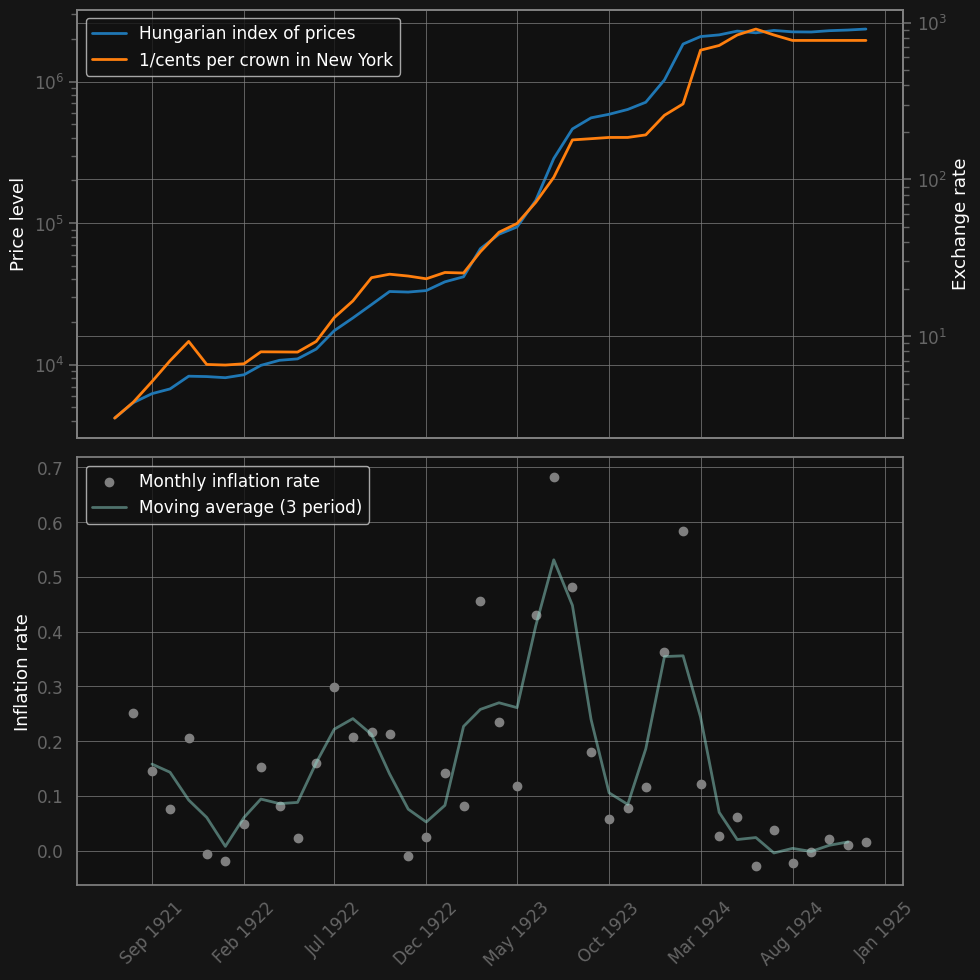

In [7]:
plot_er_prices_inflation(
    price_sequence=df_hungary["Hungarian index of prices"],
    exchange_rate_sequence=1 / df_hungary["Cents per crown in New York"],
    labels=["Hungarian index of prices", "1/cents per crown in New York"],
    index=df_hungary.index,
)

### Poland

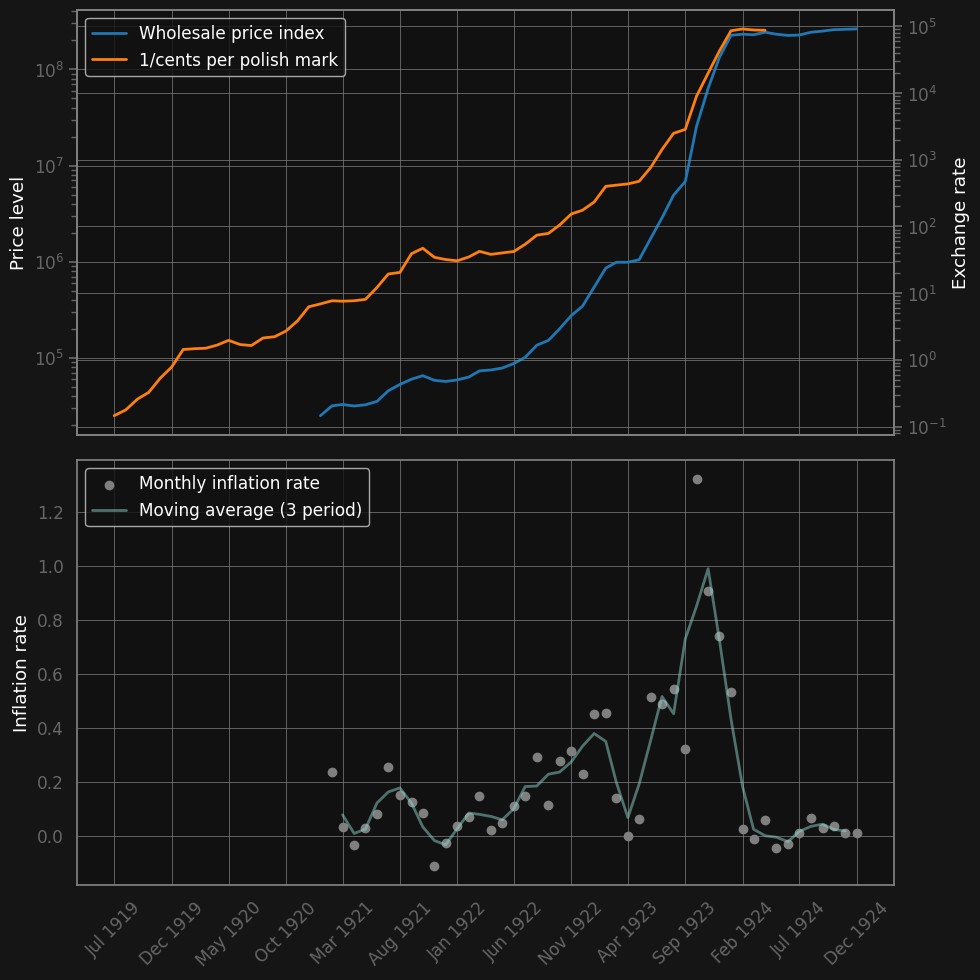

In [8]:
# splice three price series in different units
p_seq1 = df_poland["Wholesale price index"].copy()
p_seq2 = df_poland["Wholesale Price Index: " "On paper currency basis"].copy()
p_seq3 = df_poland["Wholesale Price Index: " "On zloty basis"].copy()

# non-nan part
mask_1 = p_seq1[~p_seq1.isna()].index[-1]
mask_2 = p_seq2[~p_seq2.isna()].index[-2]

adj_ratio12 = p_seq1[mask_1] / p_seq2[mask_1]
adj_ratio23 = p_seq2[mask_2] / p_seq3[mask_2]

# glue three series
p_seq = pd.concat(
    [
        p_seq1[:mask_1],
        adj_ratio12 * p_seq2[mask_1:mask_2],
        adj_ratio23 * p_seq3[mask_2:],
    ]
)
p_seq = p_seq[~p_seq.index.duplicated(keep="first")]

# exchange rate
e_seq = 1 / df_poland["Cents per Polish mark (zloty after May 1924)"]
e_seq[e_seq.index > "05-01-1924"] = np.nan

plot_er_prices_inflation(
    price_sequence=p_seq,
    exchange_rate_sequence=e_seq,
    labels=["Wholesale price index", "1/cents per polish mark"],
    index=df_poland.index,
)

### Germany

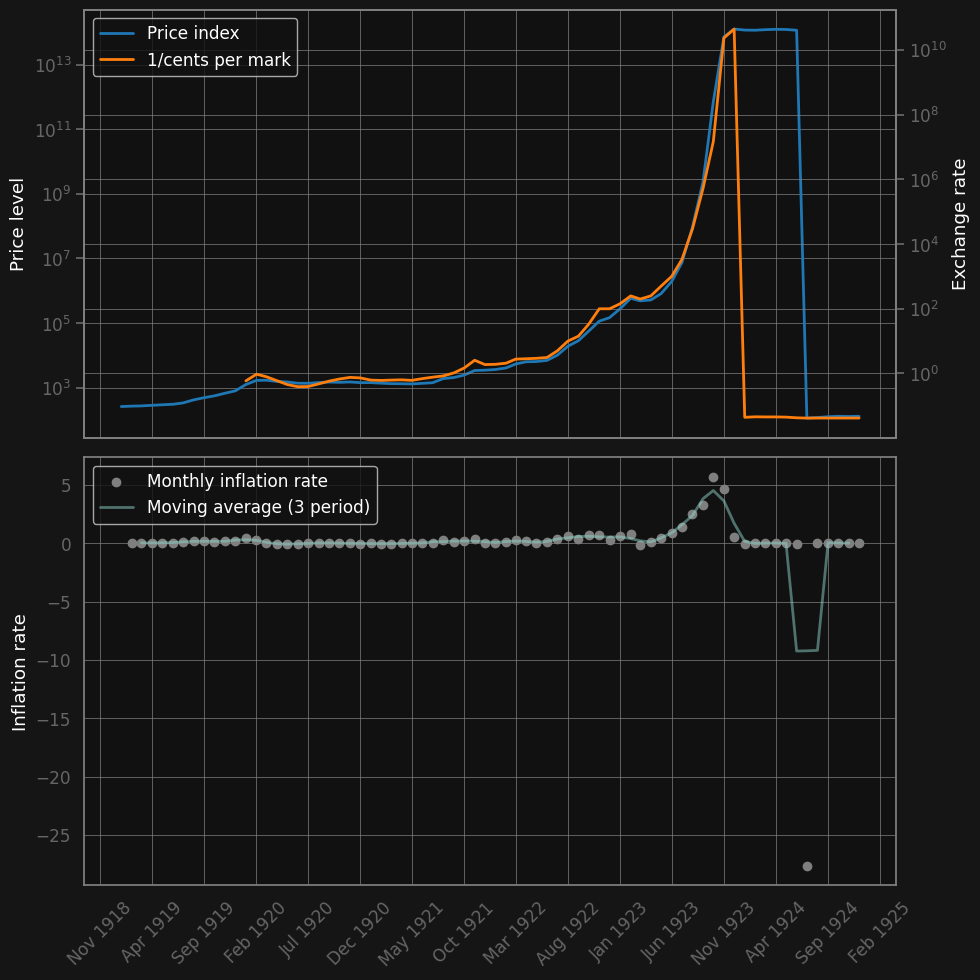

In [9]:
p_seq = df_germany[
    "Price index (on basis of marks before July 1924," "  reichsmarks after)"
].copy()
e_seq = 1 / df_germany["Cents per mark"]

plot_er_prices_inflation(
    price_sequence=p_seq,
    exchange_rate_sequence=e_seq,
    labels=["Price index", "1/cents per mark"],
    index=df_germany.index,
)

#### Observations

Each of these big inflations seemed to have “stopped on a dime”.

Chapter 3 of [Sargent and Velde, 2002] offers an explanation for this remarkable pattern.

After World War I, the United States was on a gold standard. The US government stood ready to convert a dollar into a specified amount of gold on demand.

Immediately after World War I, Hungary, Austria, Poland, and Germany were not on the gold standard. Their currencies were “fiat” or “unbacked”, meaning that they were not backed by credible government promises to convert them into gold or silver coins on demand.

The governments printed new paper notes to pay for goods and services. Technically the notes were “backed” mainly by treasury bills. But people could not expect that those treasury bills would be paid off by levying taxes, but instead by printing more notes or treasury bills.

This was done on such a scale that it led to a depreciation of the currencies of spectacular proportions. In the end, the German mark stabilized at 1 trillion (1e12) paper marks to the prewar gold mark, the Polish mark at 1.8 million paper marks to the gold zloty, the Austrian crown at 14,400 paper crowns to the prewar Austro-Hungarian crown, and the Hungarian krone at 14,500 paper crowns to the prewar Austro-Hungarian crown.

Each government stopped printing money to pay for goods and services once again and made its currency convertible to the US dollar or the UK pound.

The story told in [Sargent and Velde, 2002] is grounded in a “monetarist theory of the price level” described in A Monetarist Theory of Price Levels and Monetarist Theory of Price Levels with Adaptive Expectations.